<a href="https://colab.research.google.com/github/pavanKarthik2006/Deep-Learning-Practice/blob/main/Keras_Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels=[]
train_samples=[]

In [5]:
for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)


  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)







In [6]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)

train_labels,train_samples=shuffle(train_labels,train_samples)

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import  categorical_crossentropy

In [9]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - 5ms/step - accuracy: 0.9360 - loss: 0.2591 - val_accuracy: 0.9381 - val_loss: 0.2689
Epoch 2/30
189/189 - 1s - 5ms/step - accuracy: 0.9360 - loss: 0.2584 - val_accuracy: 0.9381 - val_loss: 0.2677
Epoch 3/30
189/189 - 1s - 3ms/step - accuracy: 0.9397 - loss: 0.2576 - val_accuracy: 0.9333 - val_loss: 0.2655
Epoch 4/30
189/189 - 1s - 6ms/step - accuracy: 0.9397 - loss: 0.2569 - val_accuracy: 0.9381 - val_loss: 0.2652
Epoch 5/30
189/189 - 0s - 2ms/step - accuracy: 0.9402 - loss: 0.2562 - val_accuracy: 0.9333 - val_loss: 0.2634
Epoch 6/30
189/189 - 1s - 3ms/step - accuracy: 0.9360 - loss: 0.2556 - val_accuracy: 0.9381 - val_loss: 0.2631
Epoch 7/30
189/189 - 1s - 3ms/step - accuracy: 0.9386 - loss: 0.2550 - val_accuracy: 0.9381 - val_loss: 0.2631
Epoch 8/30
189/189 - 0s - 2ms/step - accuracy: 0.9376 - loss: 0.2543 - val_accuracy: 0.9381 - val_loss: 0.2627
Epoch 9/30
189/189 - 1s - 3ms/step - accuracy: 0.9392 - loss: 0.2539 - val_accuracy: 0.9381 - val_loss: 0.2619
E

In [14]:
test_labels=[]
test_samples=[]

In [15]:
for i in range(50):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)


  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)


In [16]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)

test_labels,test_samples=shuffle(test_labels,test_samples)

In [17]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [18]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [19]:
for i in predictions:
  print(i)

[0.0991386  0.90086144]
[0.02328872 0.9767113 ]
[0.9184556  0.08154432]
[0.02748382 0.9725162 ]
[0.01411895 0.9858811 ]
[0.3584512 0.6415489]
[0.08496173 0.9150383 ]
[0.904297   0.09570304]
[0.05723805 0.94276196]
[0.97030354 0.0296964 ]
[0.9703036 0.0296964]
[0.06712824 0.93287176]
[0.969644   0.03035594]
[0.96661466 0.03338528]
[0.96588    0.03411997]
[0.01814374 0.9818563 ]
[0.61141485 0.38858515]
[0.01972098 0.98027897]
[0.92981315 0.07018681]
[0.56123894 0.43876112]
[0.03518246 0.9648175 ]
[0.9680495 0.0319505]
[0.07264869 0.92735136]
[0.05723805 0.94276196]
[0.96588    0.03411997]
[0.01669047 0.98330957]
[0.96897036 0.03102966]
[0.96897036 0.03102966]
[0.06199921 0.9380008 ]
[0.04493796 0.95506203]
[0.31234837 0.68765175]
[0.07264869 0.92735136]
[0.02143236 0.9785676 ]
[0.01411895 0.9858811 ]
[0.04142912 0.95857084]
[0.904297   0.09570304]
[0.9395634  0.06043661]
[0.815871 0.184129]
[0.96637404 0.0336259 ]
[0.01411895 0.9858811 ]
[0.96851313 0.03148682]
[0.04142912 0.95857084]
[0

In [21]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [22]:
for i in rounded_predictions:
  print(i)

1
1
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
1
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
0
0
0
1
1
1
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
1
0
0
0
0
1
1
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
0
0
1
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
0
0
1
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0
1
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1


In [23]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix with optional normalization.

    Parameters:
    - cm: Confusion matrix (2D numpy array)
    - classes: List of class names (for axes labels)
    - normalize: If True, show proportions; otherwise, show counts
    - title: Title of the plot
    - cmap: Colormap to use
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Print numbers in matrix
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


Confusion Matrix without normalization


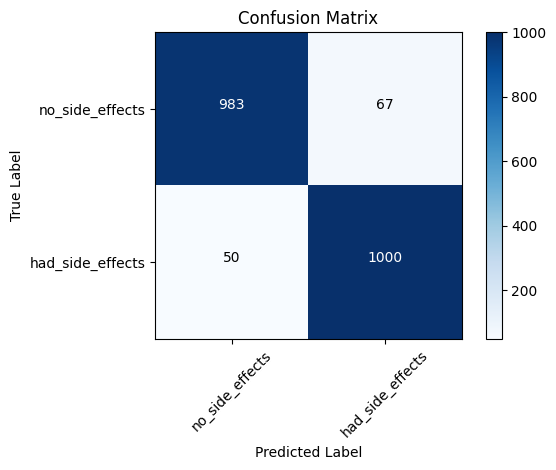

In [36]:
cm_plot_labels=['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [37]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')